In [1]:
import pandas as pd
import re
import string
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv("../data/spam.csv", encoding="latin-1")
data = data[['v1','v2']]
data.columns = ['label','message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text).strip()
    return text

data['message'] = data['message'].apply(clean_text)

In [5]:
X = data['message']
y = data['label']
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42
)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9488789237668162
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       965
        spam       1.00      0.62      0.77       150

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [6]:
text = input("Enter a message: ")
text = clean_text(text)
text_vect = vectorizer.transform([text])
prediction = model.predict(text_vect)
print("Prediction:", prediction[0])

Prediction: ham


Distribution of Spam vs Ham

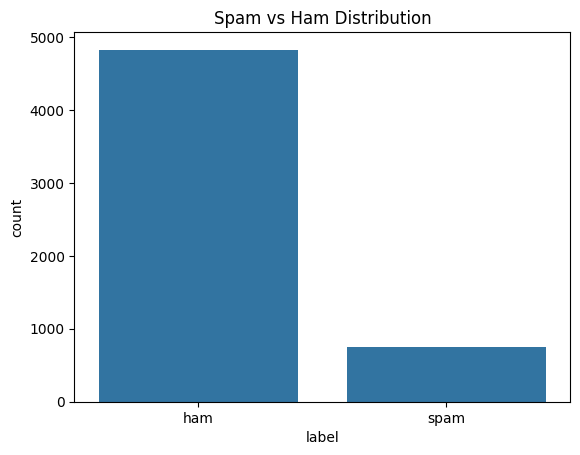

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label', data=data)
plt.title("Spam vs Ham Distribution")
plt.show()

Confusion Matrix Heatmap

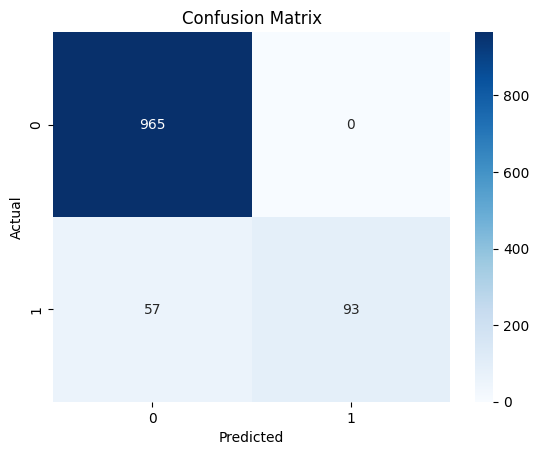

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()